In [ ]:
!pip install seaborn
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.1 MB/s 
     |████████████████████████████████| 287 kB 25.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from wordcloud import WordCloud
from tqdm import tqdm
import regex as re
from sklearn.model_selection import train_test_split
import contractions
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
import scipy
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_log_error


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas.io.parsers.readers import DataFrame
path1 = "/content/drive/MyDrive/College/Sem 5/ML/ML-Project/test.csv"
path = "/content/drive/MyDrive/College/Sem 5/ML/ML-Project/train.csv"
df = pd.read_csv(path)
df1 = pd.read_csv(path1)

In [ ]:
print(df1.columns)
print(df1.shape)

Index(['PRODUCT_ID', 'PRODUCT_NAME', 'PRODUCT_CONDITION', 'CATEGORY',
       'PRODUCT_BRAND', 'SHIPPING_AVAILABILITY', 'PRODUCT_DESCRIPTION'],
      dtype='object')
(222381, 7)


In [ ]:
df1.isnull().sum(axis=0)

PRODUCT_ID                   0
PRODUCT_NAME                 0
PRODUCT_CONDITION            0
CATEGORY                   911
PRODUCT_BRAND            94797
SHIPPING_AVAILABILITY        0
PRODUCT_DESCRIPTION          1
dtype: int64

In [ ]:
print(df.columns)

Index(['PRODUCT_ID', 'PRODUCT_NAME', 'PRODUCT_CONDITION', 'CATEGORY',
       'PRODUCT_BRAND', 'SHIPPING_AVAILABILITY', 'PRODUCT_DESCRIPTION',
       'PRODUCT_PRICE'],
      dtype='object')


In [ ]:
print(df.shape)

(1260154, 8)


In [ ]:
df.describe()

,PRODUCT_ID,PRODUCT_CONDITION,SHIPPING_AVAILABILITY,PRODUCT_PRICE
count,1.260154e+06,1.260154e+06,1.260154e+06,1.260154e+06
mean,7.408876e+05,1.907482e+00,4.472382e-01,2.672048e+01
std,4.280136e+05,9.032480e-01,4.972086e-01,3.855894e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.699312e+05,1.000000e+00,0.000000e+00,1.000000e+01
50%,7.408685e+05,2.000000e+00,0.000000e+00,1.700000e+01
75%,1.111356e+06,3.000000e+00,1.000000e+00,2.900000e+01
max,1.482534e+06,5.000000e+00,1.000000e+00,2.009000e+03


In [ ]:
small = df.iloc[1:10000]

In [ ]:
small.describe()

,PRODUCT_ID,PRODUCT_CONDITION,SHIPPING_AVAILABILITY,PRODUCT_PRICE
count,9.999000e+03,9999.000000,9999.000000,9999.000000
mean,7.458344e+05,1.903490,0.444044,26.746375
std,4.284088e+05,0.906284,0.496884,40.975167
min,3.600000e+01,1.000000,0.000000,0.000000
25%,3.702105e+05,1.000000,0.000000,10.000000
50%,7.435350e+05,2.000000,0.000000,17.000000
75%,1.117325e+06,3.000000,1.000000,29.000000
max,1.482524e+06,5.000000,1.000000,1575.000000


# EDA (Exploratory Data Analysis)

## Checking For NULL Values


In [ ]:
df.isnull().any()

PRODUCT_ID               False
PRODUCT_NAME             False
PRODUCT_CONDITION        False
CATEGORY                  True
PRODUCT_BRAND             True
SHIPPING_AVAILABILITY    False
PRODUCT_DESCRIPTION       True
PRODUCT_PRICE            False
dtype: bool

In [ ]:
df.isnull().sum(axis=0)

PRODUCT_ID                    0
PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537885
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           3
PRODUCT_PRICE                 0
dtype: int64

Here, we can clearly see that only CATEGORY, PRODUCT_BRAND and 3 rows of product_DESCRIPTION have null values in them

In [ ]:
df[df['PRODUCT_DESCRIPTION'].isna()]

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE
87263,511535,Shoes for Michelle,4,Kids/Girls 0-24 Mos/Shoes,NaN,0,NaN,9.0
283509,1224924,Disney Minnie Head band,3,Women/Women's Accessories/Hair Accessories,Disney,0,NaN,9.0
318034,861230,Lipgloss,4,Beauty/Makeup/Lips,NaN,0,NaN,49.0


## Checking for Duplicate Rows

In [ ]:
df[df.duplicated()]

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE


So we can infer that there are no duplicate data points in the given dataset.

## Product_Name

In [ ]:
df["PRODUCT_NAME"].describe()

count     1260154
unique    1052486
top        Bundle
freq         1873
Name: PRODUCT_NAME, dtype: object

We noticed that there are 1052486 unique product names in out dataset. In 1873 datapoints, the word "Bundle" is present. This is the most commonly occuring word in the product name.

In [ ]:
print('Top 10 names in train dataset')
display(df["PRODUCT_NAME"].value_counts()[:10])

Top 10 names in train dataset


Bundle                 1873
Reserved                391
Converse                376
BUNDLE                  358
Dress                   349
Lularoe TC leggings     338
Coach purse             331
Romper                  297
Nike                    288
Vans                    282
Name: PRODUCT_NAME, dtype: int64

'Bundle', 'Reserved', 'Converse', 'BUNDLE', 'Dress' are the top 5 most occuring product names in our dataset. Here, we notice that even though 'Bundle' and 'BUNDLE' represent the same product however due to case sensitivity it has been interpreted differently in our EDA of the dataset. This will be taken care during preprocessing of the data.
Most of the commonly occuring item names contain the item brand.

In [ ]:
count = df['PRODUCT_NAME'].str.split().str.len()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.legend(*args, **kwargs)>

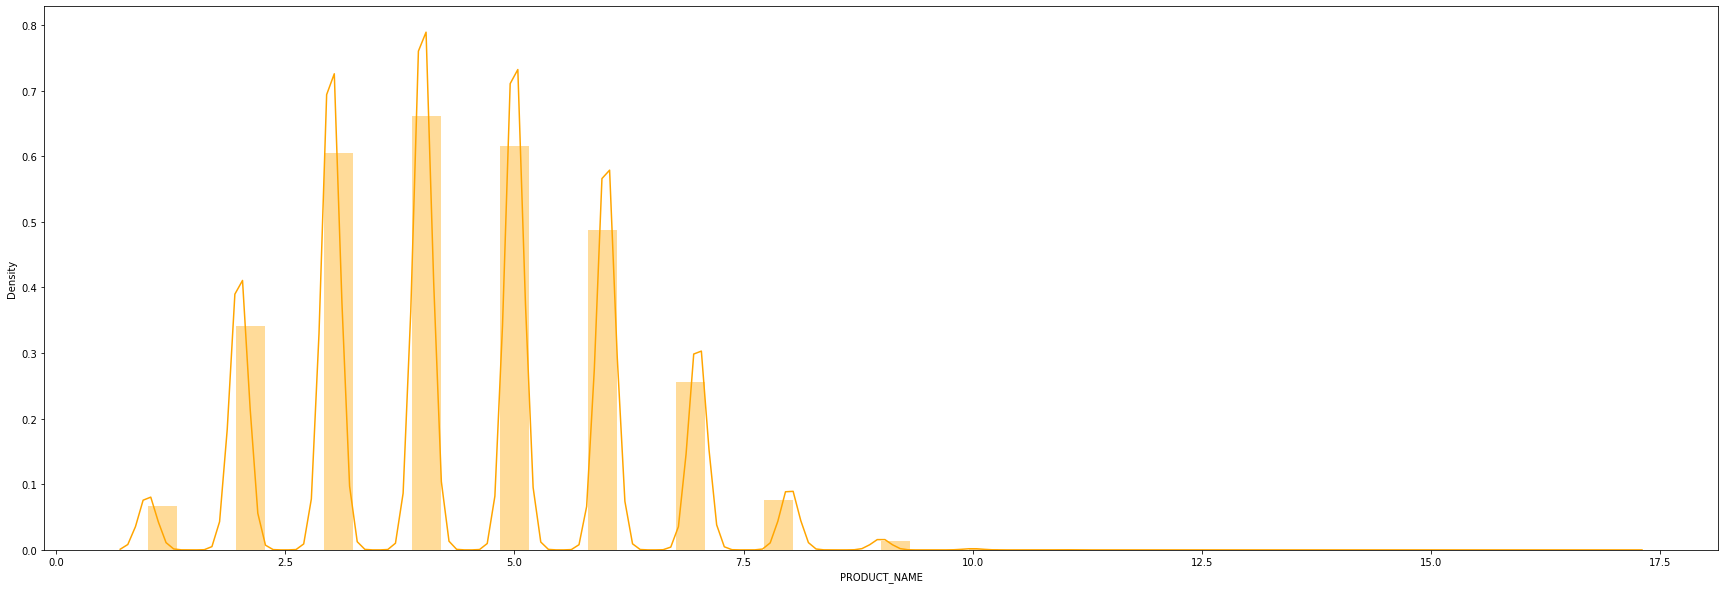

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
sns.distplot(count, color="orange", label="Word Count")
plt.legend

We can observe that most of the item names contain 2-5 words

## Brand

### Let us take the top 20 brands into consideration

In [ ]:
print("List of most popular brands")
for brand in df["PRODUCT_BRAND"].value_counts()[:20].index:
  print(brand)

List of most popular brands
Nike
PINK
Victoria's Secret
LuLaRoe
Apple
FOREVER 21
Nintendo
Lululemon
Michael Kors
American Eagle
Rae Dunn
Sephora
Coach
Disney
Bath & Body Works
Adidas
Funko
Under Armour
Sony
Old Navy


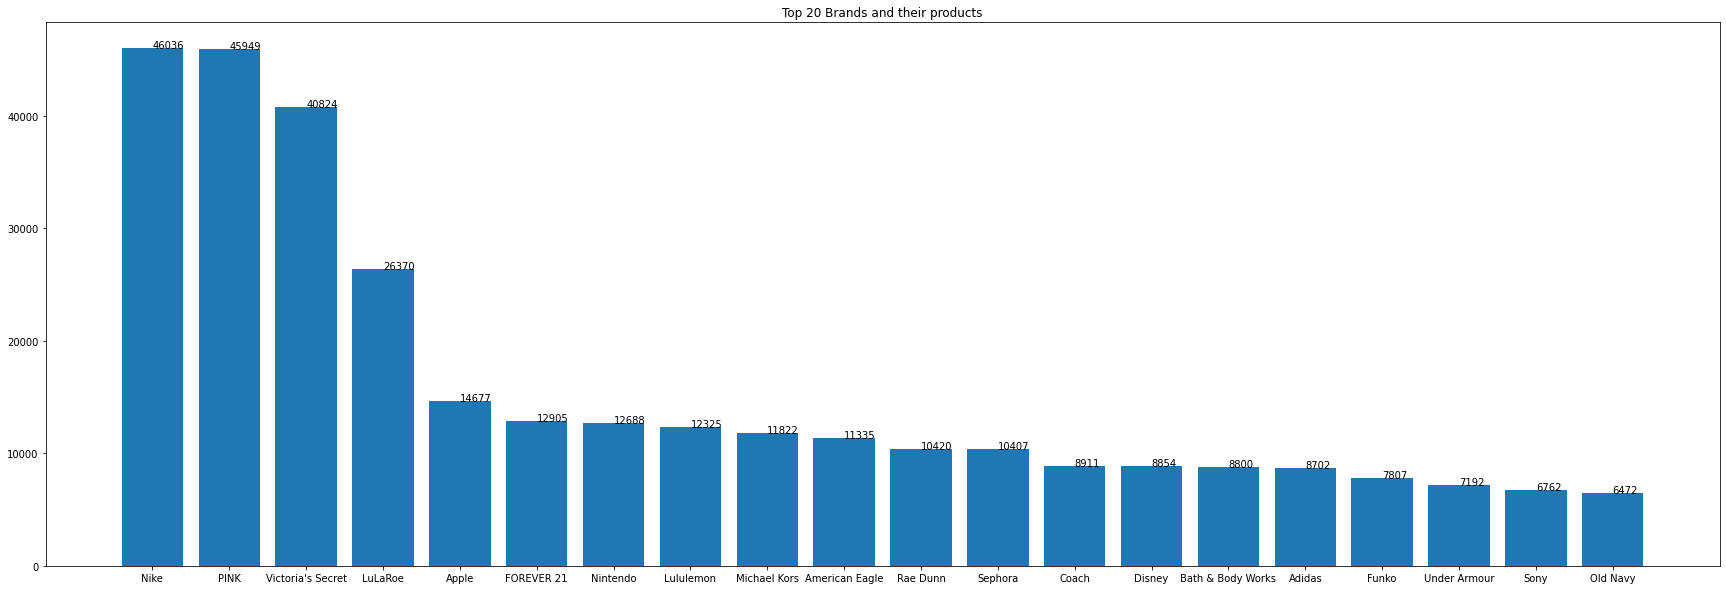

In [ ]:
indexes = df["PRODUCT_BRAND"].value_counts()[:20].index
vals = df["PRODUCT_BRAND"].value_counts()[:20].values
plt.rcParams["figure.figsize"] = (30,10)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.title("Top 20 Brands and their products")

for i in range(len(indexes)):
  plt.text(i, vals[i],vals[i])

plt.bar(indexes, vals)
plt.show()

We can clearly see that the brands which have the most number of items are clothing brands.




### Let us Compare the most expensive brands with their prices

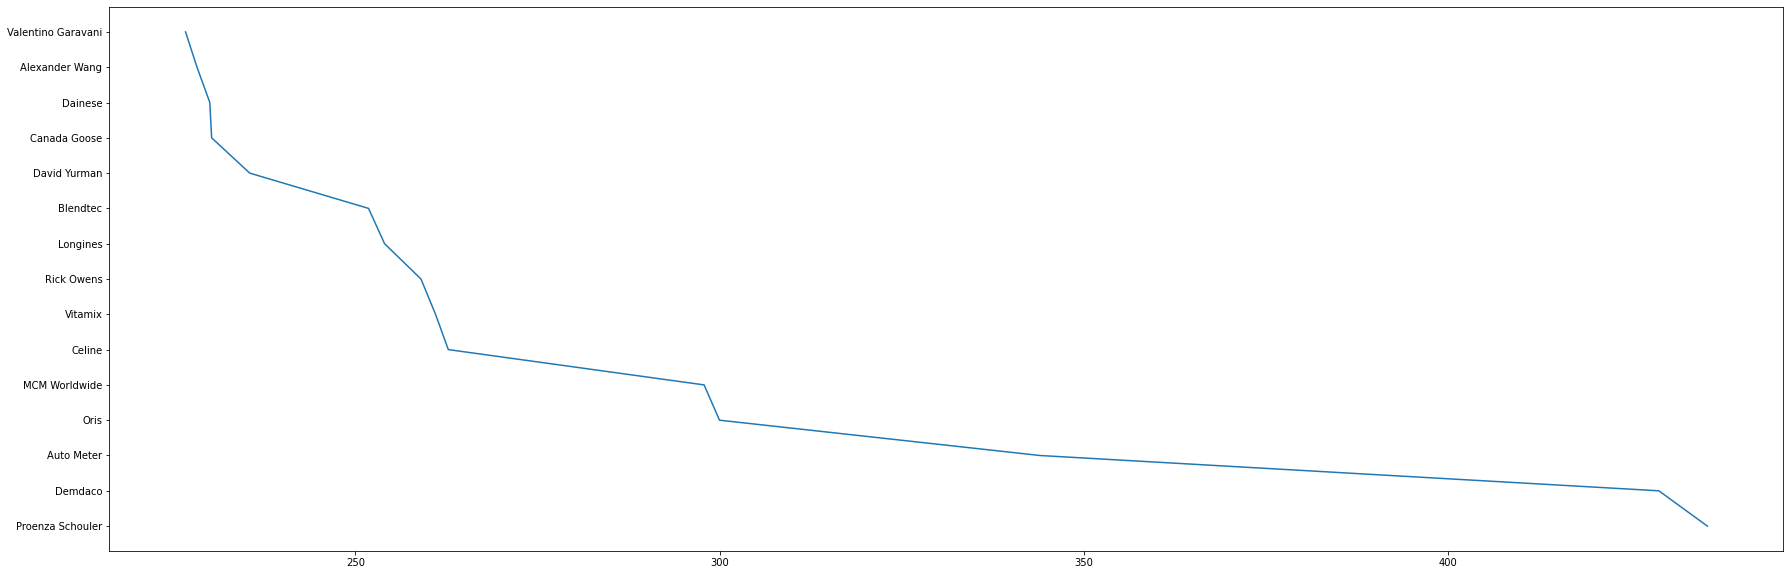

In [ ]:
top_brands = df.groupby('PRODUCT_BRAND').mean().sort_values("PRODUCT_PRICE", ascending=False)['PRODUCT_PRICE'].reset_index()[:15]
plt.plot(top_brands["PRODUCT_PRICE"], top_brands["PRODUCT_BRAND"])

There are 4632 brands in the dataset

## Item_Condition

### Let us compare what % of all items belong to a particular condition

Item Condition 1 - 43.21154398589378%
Item Condition 2 - 29.171037825535613%
Item Condition 3 - 25.30333594148017%
Item Condition 4 - 2.1535463125935403%
Item Condition 5 - 0.16053593449689482%


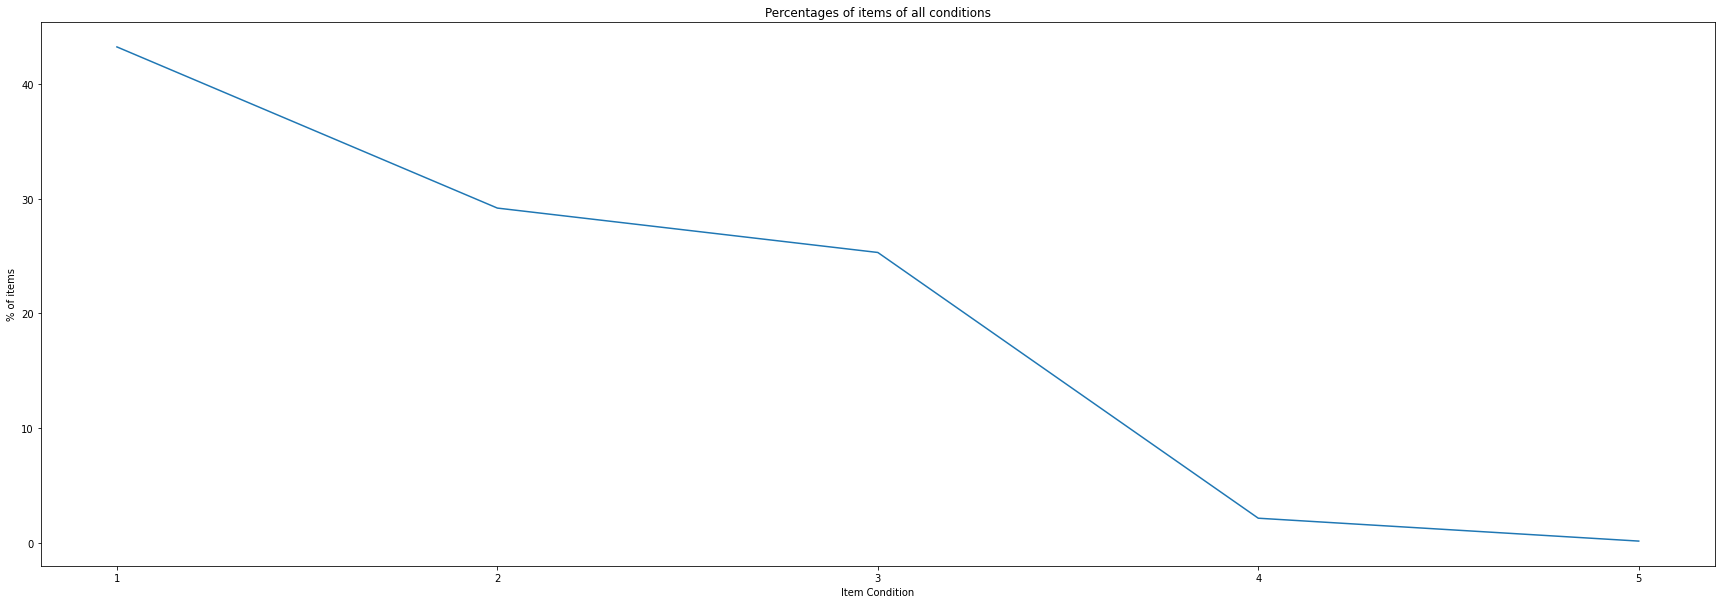

In [ ]:
x = [1,2,3,4,5]
y = df["PRODUCT_CONDITION"].value_counts().values/len(df["PRODUCT_CONDITION"])*100

for i in range(len(x)):
  print("Item Condition "+str(i+1)+" - "+ str(y[i])+"%")

plt.xticks([1,2,3,4,5])
plt.plot(x, y)
plt.xlabel("Item Condition")
plt.ylabel("% of items")
plt.title("Percentages of items of all conditions")
plt.show();

Most of the items in the dataset are of condition 1/2.
So here we notice that significantly less number of datapoints are available in the Product Condition 4 and 5. Therefore, in order to understand this disparity, we next plot boxplot and pdf of this feature against log prices.

In [ ]:
df['LOG_PRODUCT_PRICE']= np.log(df['PRODUCT_PRICE'].values)

<ipython-input-25-57363e47568c>:1: RuntimeWarning: divide by zero encountered in log
  df['LOG_PRODUCT_PRICE']= np.log(df['PRODUCT_PRICE'].values)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

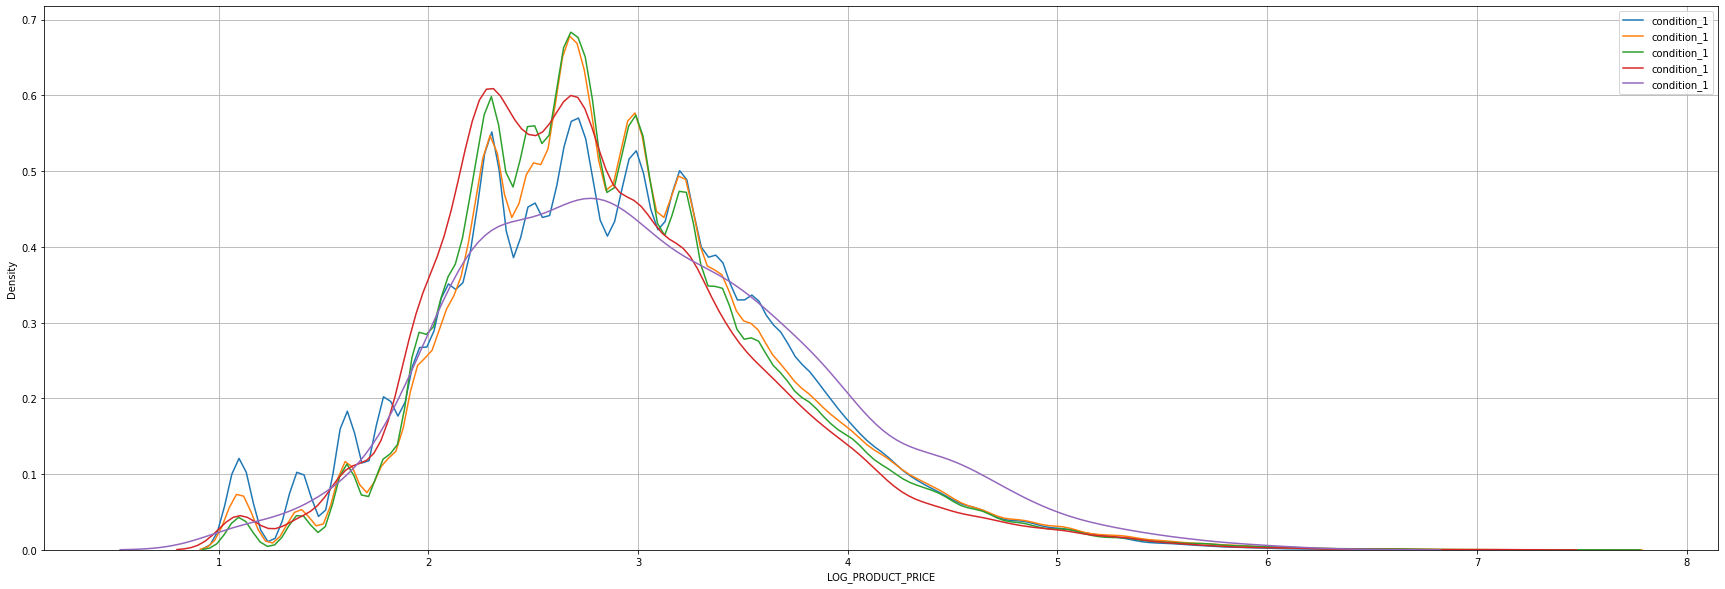

In [ ]:
condArr = [0,0,0,0,0,0,0,0]

for i in range(1,6):
  condArr[i-1] = df[df['PRODUCT_CONDITION']==i]['LOG_PRODUCT_PRICE']

for i in range(1,6):
  plot = sns.distplot(condArr[i-1], hist=False, label="condition_1")

h,l = plot.get_legend_handles_labels()
plot.legend(h,l)
plt.grid()

So from inspection of pdf of product condtion and log_product_prices we can infer that condition 1 refers to the best condtion of the product and condition decreases from condition_2 till condition_5(bad).

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


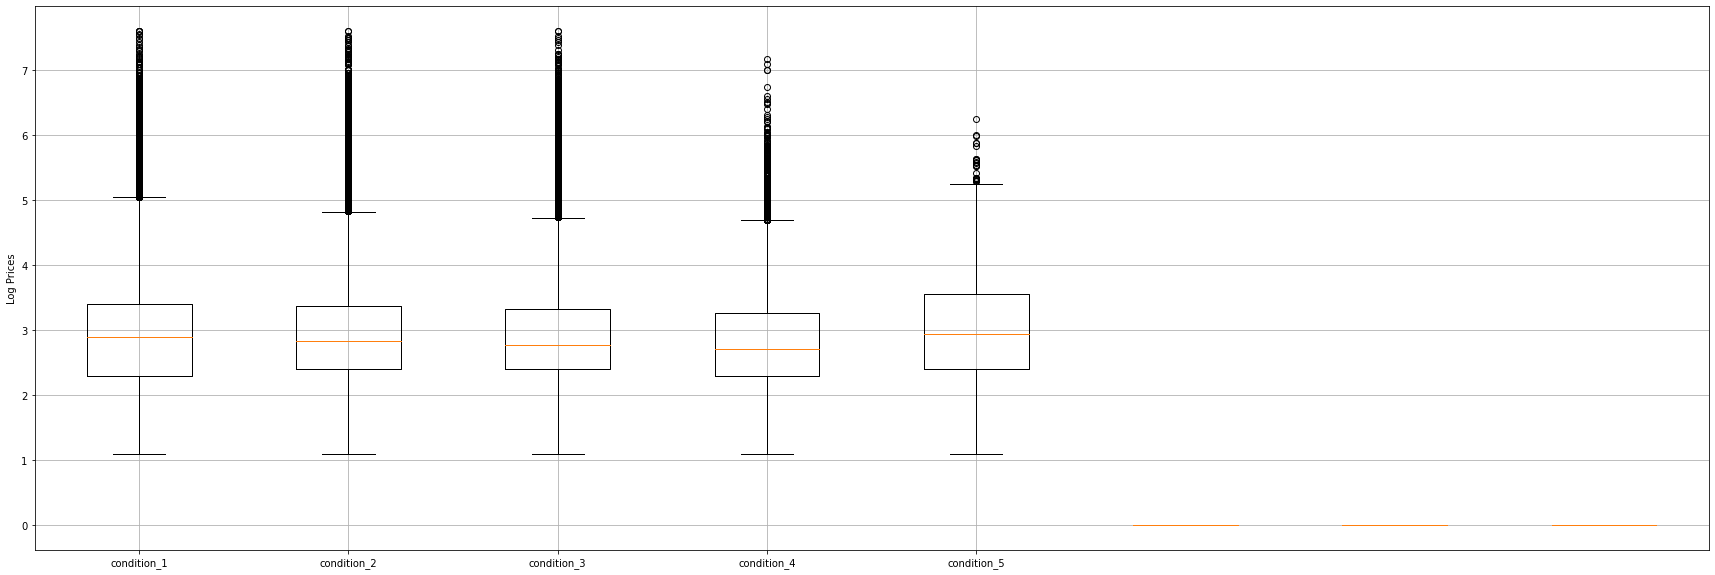

In [ ]:
plt.boxplot(condArr)
plt.xticks([1,2,3,4,5],('condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5'))
plt.ylabel('Log Prices')
plt.grid()
plt.show()

There is a slight variation of price based on item condition and this can be observed of the median prices for each condition in their boxplots. Also it is noticed that median price decreases as we movr from condtion_1 to condition_4. However, there is a increase in the median price of condition_5 from condition_4. This might be due to the fact that those products in poor condition are of such category where the prices are usually higher, for instance electronic category like laptop, sports category like hoverboard, etc. So their native prices are itself very high. 

## Price

In [ ]:
df['PRODUCT_PRICE'].describe()

count    1.260154e+06
mean     2.672048e+01
std      3.855894e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: PRODUCT_PRICE, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


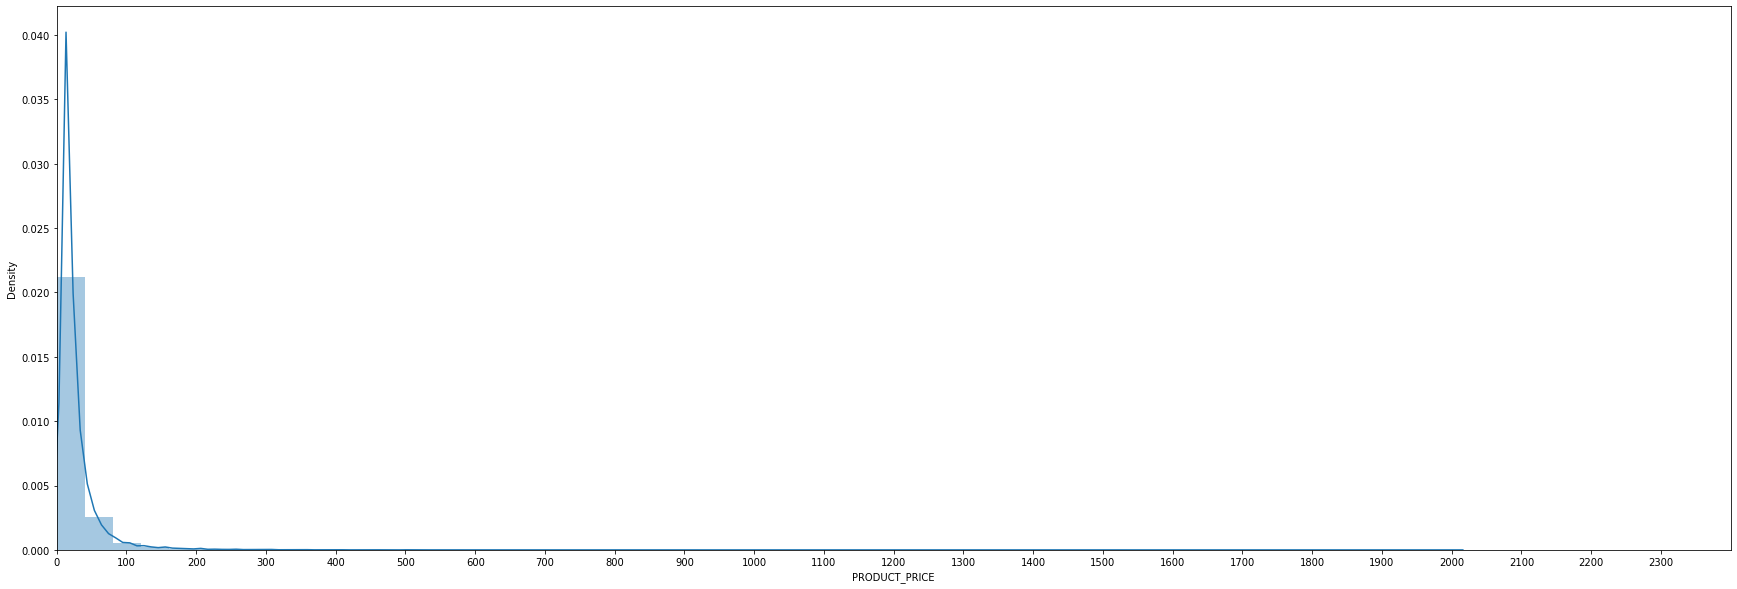

In [ ]:
fig,ax = plt.subplots()
ax.set_xlim(0,2400)
ax.set_xticks(range(0,2400,100))
sns.distplot(df["PRODUCT_PRICE"])

Clearly, the data heavily skewed and most of the item prices lie between 0 and 150.

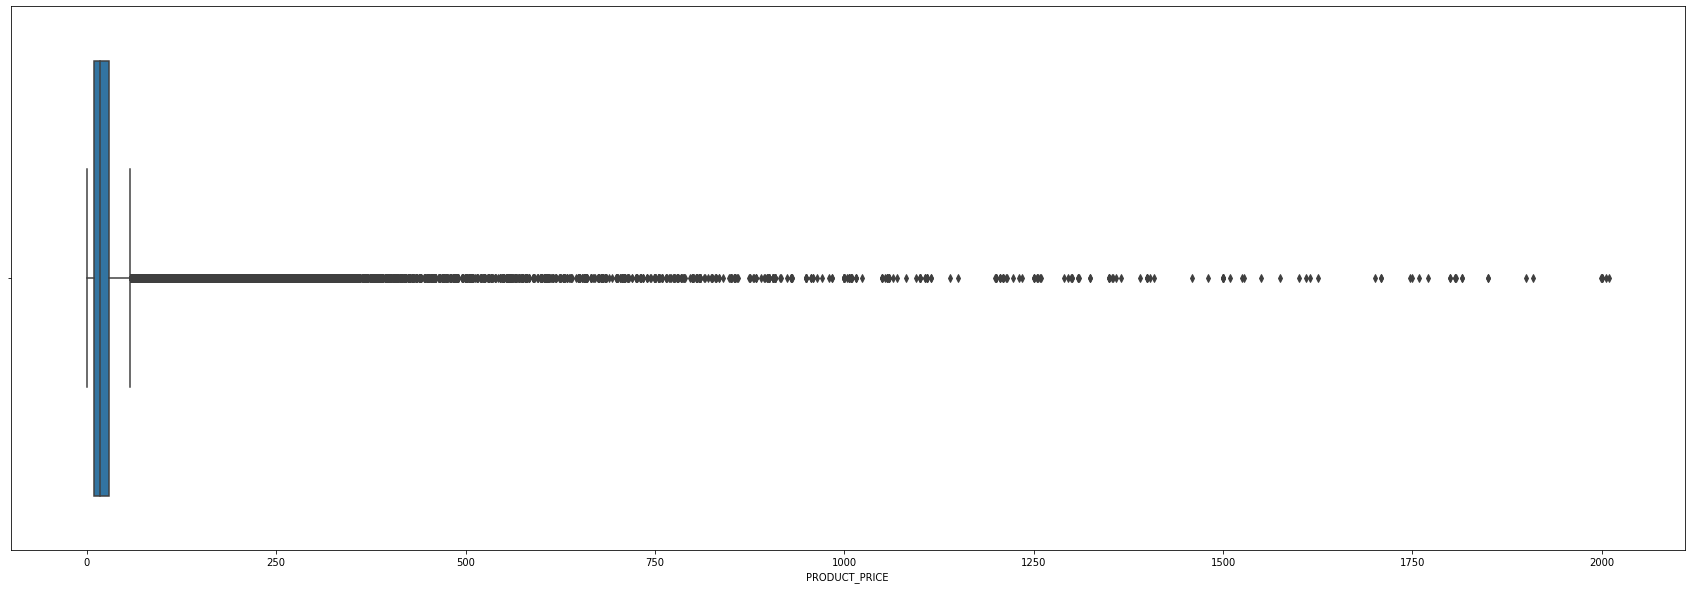

In [ ]:
sns.boxplot(x='PRODUCT_PRICE', data = df, showfliers = True)
plt.show()

Clearly, there are a outliers that we need to deal with during preprocessing. As the price increases, there are lesser number of items. This distribution looks familiar to that of pareto distribution.

In [ ]:
from prettytable import PrettyTable
Table = PrettyTable(['%tile','Price'])
print('Percentile range - 0%ile - 100%ile')

for i in range(0,101,10):
    #print(i,"%ile is",np.percentile(df['PRODUCT_PRICE'].values, i))
    Table.add_row([i,np.percentile(df['PRODUCT_PRICE'].values, i)])

print(Table)

print('**************************************************************')
Table1 = PrettyTable(['%tile','Price'])
print('Percentile range - 90%ile - 100%ile')
for j in range(90,101):
   #print(j,"%ile is",np.percentile(df['PRODUCT_PRICE'].values, j))
   Table1.add_row([j,np.percentile(df['PRODUCT_PRICE'].values, j)])

print(Table1)   

print('**************************************************************')
Table2 = PrettyTable(['%tile','Price'])
print('Percentile range - 99%ile - 100%ile')
lst = [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
for k in lst:
   #print(k,"%tile is",np.percentile(df['PRODUCT_PRICE'].values, k))
   Table2.add_row([k,np.percentile(df['PRODUCT_PRICE'].values, k)])

print(Table2)   

print('**************************************************************')

print("Number of products with 'PRODUCT_PRICE > 170' =",len(df[df['PRODUCT_PRICE']>170]['PRODUCT_PRICE']))


Percentile range - 0%ile - 100%ile
+-------+--------+
| %tile | Price  |
+-------+--------+
|   0   |  0.0   |
|   10  |  7.0   |
|   20  |  10.0  |
|   30  |  12.0  |
|   40  |  14.0  |
|   50  |  17.0  |
|   60  |  20.0  |
|   70  |  26.0  |
|   80  |  34.0  |
|   90  |  51.0  |
|  100  | 2009.0 |
+-------+--------+
**************************************************************
Percentile range - 90%ile - 100%ile
+-------+--------+
| %tile | Price  |
+-------+--------+
|   90  |  51.0  |
|   91  |  55.0  |
|   92  |  58.0  |
|   93  |  62.0  |
|   94  |  67.0  |
|   95  |  75.0  |
|   96  |  85.0  |
|   97  |  99.0  |
|   98  | 122.0  |
|   99  | 170.0  |
|  100  | 2009.0 |
+-------+--------+
**************************************************************
Percentile range - 99%ile - 100%ile
+-------+-------------------+
| %tile |       Price       |
+-------+-------------------+
|  99.1 |       180.0       |
|  99.2 |       189.0       |
|  99.3 |       200.0       |
|  99.4 |       2

From the prices at the above percentiles, we can infer that 99% of the prices are less that 170. The higher prices are outliers but they are not anomalies. 

 
We decided to use log prices because here we can keep the higher priced products, but as most of the products are lower priced.
Our model would have to learn the most frequently occuring prices over outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


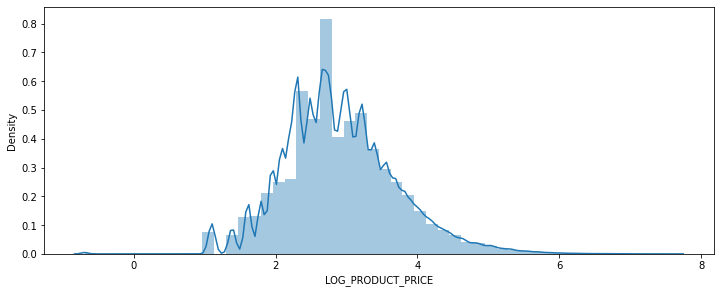

In [ ]:
from scipy import stats
#def float_to_int(x):
#    if x == float('inf') or x == float('-inf'):
#        return float('10000000000000') # or a large value you choose
#    return int(x)
PROD_PRICE = df['PRODUCT_PRICE']
PROD_PRICE.replace(to_replace = 0, value = 0.5, inplace=True)
df['LOG_PRODUCT_PRICE']= np.log(df['PRODUCT_PRICE'].values)

plt.figure(figsize=(12,10))
plt.subplot(211)
sns.distplot(df['LOG_PRODUCT_PRICE'])

## Shipping


In [ ]:
no_rows = df.shape[0]
print("No Shipping =", round(df['SHIPPING_AVAILABILITY'].value_counts()[0]/no_rows*100,1),'%')
print("With Shipping =", round(df['SHIPPING_AVAILABILITY'].value_counts()[1]/no_rows*100,1),'%')


No Shipping = 55.3 %
With Shipping = 44.7 %


Text(0, 0.5, 'Number of products')

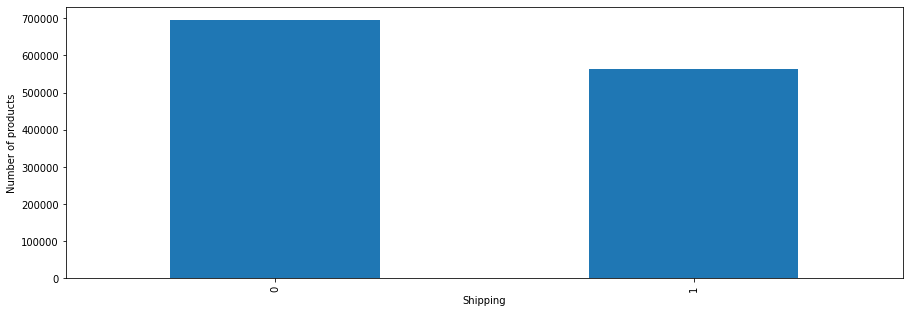

In [ ]:
plot = df['SHIPPING_AVAILABILITY'].value_counts().plot.bar(figsize=(15,5))
plot.set_xlabel("Shipping")
plot.set_ylabel("Number of products")

There is not much difference between numbero of items that are sold with and without shipping.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


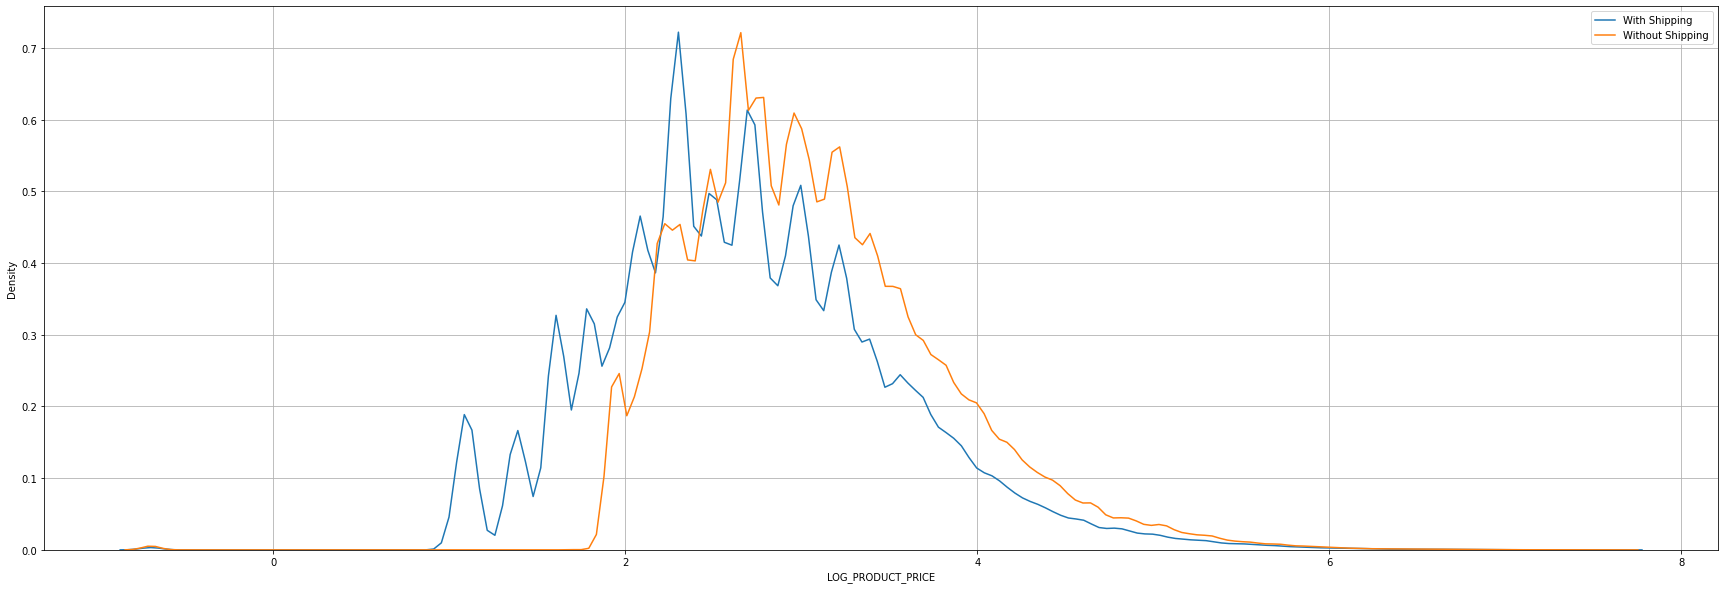

In [ ]:
plot = sns.distplot(df[df['SHIPPING_AVAILABILITY']==1]['LOG_PRODUCT_PRICE'], hist=False, label="With Shipping")
plot = sns.distplot(df[df['SHIPPING_AVAILABILITY']==0]['LOG_PRODUCT_PRICE'], hist=False, label="Without Shipping")
h,l = plot.get_legend_handles_labels()
plot.legend(h, l)
plt.grid()

We can clearly see that at low prices, shipping cost is applied and for more expensive items, shipping cost is not included.

In [ ]:
df.describe()

,PRODUCT_ID,PRODUCT_CONDITION,SHIPPING_AVAILABILITY,PRODUCT_PRICE,LOG_PRODUCT_PRICE
count,1.260154e+06,1.260154e+06,1.260154e+06,1.260154e+06,1.260154e+06
mean,7.408876e+05,1.907482e+00,4.472382e-01,2.672077e+01,2.910402e+00
std,4.280136e+05,9.032480e-01,4.972086e-01,3.855874e+01,7.933678e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e-01,-6.931472e-01
25%,3.699312e+05,1.000000e+00,0.000000e+00,1.000000e+01,2.302585e+00
50%,7.408685e+05,2.000000e+00,0.000000e+00,1.700000e+01,2.833213e+00
75%,1.111356e+06,3.000000e+00,1.000000e+00,2.900000e+01,3.367296e+00
max,1.482534e+06,5.000000e+00,1.000000e+00,2.009000e+03,7.605392e+00


## Pre-processing


## Text Processing

In [ ]:
tempdf = df.iloc[1:100]

In [ ]:
def preprocessText(sent):

  #Decontracting
  sent = str(sent)
  updated_sent = []
  for word in sent.split():
    updated_sent.append(contractions.fix(word))

  updated_text = ' '.join(updated_sent)

  #Removing Stopwords
  removed_stopwords = remove_stopwords(updated_text)
  return removed_stopwords


In [ ]:
df["PRODUCT_DESCRIPTION"] = df["PRODUCT_DESCRIPTION"].apply(preprocessText)
df1["PRODUCT_DESCRIPTION"] = df1["PRODUCT_DESCRIPTION"].apply(preprocessText)

### Filling missing Values in Description

In [ ]:
df['PRODUCT_DESCRIPTION'].fillna('No Description', inplace=True)
df1['PRODUCT_DESCRIPTION'].fillna('No Description', inplace=True)

In [ ]:
df.isnull().sum(axis=0)

PRODUCT_ID                    0
PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537885
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           0
PRODUCT_PRICE                 0
LOG_PRODUCT_PRICE             0
dtype: int64

In [ ]:
df1.isnull().sum(axis=0)

PRODUCT_ID                   0
PRODUCT_NAME                 0
PRODUCT_CONDITION            0
CATEGORY                   911
PRODUCT_BRAND            94797
SHIPPING_AVAILABILITY        0
PRODUCT_DESCRIPTION          0
dtype: int64

### Filling missing Values in Brand Name

In [ ]:
descList = df["PRODUCT_DESCRIPTION"].values
brand_List = df[df['PRODUCT_BRAND'] != '']['PRODUCT_BRAND'].unique()


In [ ]:
descList_te = df1["PRODUCT_DESCRIPTION"].values
brand_List_te = df1[df1['PRODUCT_BRAND'] != '']['PRODUCT_BRAND'].unique()


Making a dictionary to map brands with categories

In [ ]:
def concat_categories(x):
        return set(x.values)

cat_brand_dict = dict(df[df['PRODUCT_BRAND'] != 'unk_brand'][['PRODUCT_BRAND','CATEGORY']].astype('str').groupby('PRODUCT_BRAND').agg(concat_categories).reset_index().values.tolist())

In [ ]:
cat_brand_dict_te = dict(df1[df1['PRODUCT_BRAND'] != 'unk_brand'][['PRODUCT_BRAND','CATEGORY']].astype('str').groupby('PRODUCT_BRAND').agg(concat_categories).reset_index().values.tolist())

In [ ]:
df.shape

(1260154, 9)

Function to check if brand name is present in description. If it is present, the empty PRODUCT_BRAND is replaced by the brand found in description

In [ ]:
new_brand=[]
replacedArr=[]
counter = 0;
for row in df.itertuples():
  counter+=1
  flag = False
  if str(row.PRODUCT_BRAND) == 'nan':
    for brand in brand_List:
      if str(brand) in str(row.PRODUCT_DESCRIPTION):
        new_brand.append(str(brand))
        replacedArr.append(str(brand))
        flag = True
        break
    if not flag:
      new_brand.append("")
  else:
    new_brand.append(str(row.PRODUCT_BRAND))

df["PRODUCT_BRAND"] = new_brand

In [ ]:
new_brand1=[]
replacedArr1=[]
counter1 = 0;
for row in df1.itertuples():
  counter1 += 1
  flag1 = False
  # print(row.PRODUCT_BRAND, type(row.PRODUCT_BRAND))
  if str(row.PRODUCT_BRAND) == 'nan':
    for brand in brand_List:
      if str(brand) in str(row.PRODUCT_DESCRIPTION):
        # row.PRODUCT_BRAND = brand
        # print(counter)
        new_brand1.append(str(brand))
        replacedArr1.append(str(brand))
        flag1 = True
        break
    if not flag1:
      new_brand1.append("")
  else:
    new_brand1.append(str(row.PRODUCT_BRAND))

df1["PRODUCT_BRAND"] = new_brand1

In [ ]:
len(replacedArr)

244758

In [ ]:
len(replacedArr1)

43109

244758 brand names were predicted accurately from the 1260154 rows

## Correlation Matrix


<h2> Brand + Condition vs log_price </h2>

## Splitting Categories

In [ ]:
df['CATEGORY'].fillna('empty_cat', inplace=True)
df1['CATEGORY'].fillna('empty_cat', inplace=True)

In [ ]:
df1['CATEGORY'].fillna('empty_cat', inplace=True)

In [ ]:
df.isnull().sum(axis=0)

PRODUCT_ID               0
PRODUCT_NAME             0
PRODUCT_CONDITION        0
CATEGORY                 0
PRODUCT_BRAND            0
SHIPPING_AVAILABILITY    0
PRODUCT_DESCRIPTION      0
PRODUCT_PRICE            0
LOG_PRODUCT_PRICE        0
dtype: int64

In [ ]:
df1.isnull().sum(axis=0)

PRODUCT_ID               0
PRODUCT_NAME             0
PRODUCT_CONDITION        0
CATEGORY                 0
PRODUCT_BRAND            0
SHIPPING_AVAILABILITY    0
PRODUCT_DESCRIPTION      0
dtype: int64

In [ ]:
def split_text(text):
    if text=='empty_cat':
        return ["None", "None", "None"]
    return text.split("/")

In [ ]:
df['MAIN_CATEGORY'], df['SUBCAT_1'], df['SUBCAT_2'] = zip(*df['CATEGORY'].apply(lambda x: split_text(x)))
df = df.drop('CATEGORY', axis=1)

In [ ]:
df1['MAIN_CATEGORY'], df1['SUBCAT_1'], df1['SUBCAT_2'] = zip(*df1['CATEGORY'].apply(lambda x: split_text(x)))
df1 = df1.drop('CATEGORY', axis=1)

In [ ]:
df

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,LOG_PRODUCT_PRICE,MAIN_CATEGORY,SUBCAT_1,SUBCAT_2
0,952289,Lipstick queen reserved maiwu,4,Lipstick Queen,0,Lipstick Queen Jean Queen medieval lipstick co...,20.0,2.995732,Beauty,Makeup,Lips
1,121903,Garbage Pail Kids blu ray,3,,1,26Plays great. Tested. Watched once. No scratc...,15.0,2.708050,Electronics,Media,Blu-Ray
2,280534,green floam/slime,1,CHI,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0,2.079442,Kids,Toys,Arts & Crafts
3,787961,Wallet beige monogram,1,,0,Wallet brand new,31.0,3.433987,Women,Women's Accessories,Wallets
4,479292,Triangle Bike Or Body Blue Light,3,Triangl,0,"Triangle Bike Or Body Blue Light, steady flash...",8.0,2.079442,Sports & Outdoors,Outdoors,Other
...,...,...,...,...,...,...,...,...,...,...,...
1260149,259178,Brooks brothers girls,3,Brooks Brothers,0,"Beautiful dress, favorites. Sz. 6. Beautiful g...",12.0,2.484907,Kids,Girls (4+),Dresses
1260150,1414414,LulaRoe Randy size Large,1,,0,"Brand new, worn washed, size Large, Navy sleev...",34.0,3.526361,Women,Tops & Blouses,Knit Top
1260151,131932,This sale is,1,,0,American girl doll Tenney. Comes doll book onl...,99.0,4.595120,Kids,Toys,Dolls & Accessories
1260152,671155,Iphone headphone lightning cable split,1,Apple,0,No description,9.0,2.197225,Electronics,Cell Phones & Accessories,Cables & Adapters


In [ ]:
df1

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,MAIN_CATEGORY,SUBCAT_1,SUBCAT_2
0,777341,F/ship 4 Totoro Washi + 1 pen,1,Tag,1,This listing 4 Totoro washi tape limited time ...,Handmade,Paper Goods,Stationery
1,1463629,UCLA Men's Bundle + Shorts,1,Adidas,1,7 items. 1: XL. 2: 2XL. 3:2XL. 4: XL. 5: 2XL. ...,Women,Other,Other
2,350669,Listing for lol,1,,1,- sunglasses necklace :),Beauty,Makeup,Lips
3,310222,25 pcs kawaii sticker flakes,1,,1,I ordered bunch stickers recieve cute ones! :),Kids,Toys,Arts & Crafts
4,759257,Chanel Mini Lipgloss Set,2,Chanel,1,Brand new authentic Mini Lipgloss gift set,Beauty,Makeup,Lips
...,...,...,...,...,...,...,...,...,...
222376,491588,Vs pink bling hoodie,3,PINK,0,Worn washed Hung dry Missing hoodie string Opa...,Women,Sweaters,Hooded
222377,1410603,Gap wool blend Moto jacket,2,Gap,1,Another super cute jacket. Wool blend exterior...,Women,Coats & Jackets,Wool
222378,207926,Vs thong NWT,1,Victoria's Secret,0,Victoria's Secret gold black lace thong size s...,Women,Underwear,G-Strings & Thongs
222379,241496,Clearance! Pink charms bundle 30pc,1,All,0,Note: Pandora fit Pandora bracelet! Price 30 p...,Handmade,Accessories,Charm


In [ ]:
from sklearn.preprocessing import StandardScaler
def get_len_feature(col_series, scaler_text_len=None):
    text_len = col_series.apply(lambda x: len(x.split()))
    if scaler_text_len==None:
        scaler_text_len = StandardScaler()
        scaler_text_len.fit(text_len.values.reshape(-1, 1))
    text_len = scaler_text_len.transform(text_len.values.reshape(-1, 1))
    return text_len, scaler_text_len

## Sparse Shipping

In [ ]:
copy = df.copy()

In [ ]:
train_copy = df.copy()
test_copy = df1.copy()

new_x_train = train_copy.drop(['PRODUCT_ID','LOG_PRODUCT_PRICE','PRODUCT_PRICE'], axis=1)
new_y_train = train_copy['LOG_PRODUCT_PRICE']
new_x_test = test_copy.drop(['PRODUCT_ID'], axis=1)

In [ ]:
print(new_x_train.shape)
print(new_y_train.shape)
print(new_x_test.shape)

(1260154, 8)
(1260154,)
(222381, 8)


In [ ]:
# X = copy.drop(['PRODUCT_ID','LOG_PRODUCT_PRICE','PRODUCT_PRICE'], axis=1)
# y = copy['LOG_PRODUCT_PRICE']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [ ]:
new_x_train.isnull().any()

PRODUCT_NAME             False
PRODUCT_CONDITION        False
PRODUCT_BRAND            False
SHIPPING_AVAILABILITY    False
PRODUCT_DESCRIPTION      False
MAIN_CATEGORY            False
SUBCAT_1                 False
SUBCAT_2                 False
dtype: bool

In [ ]:
new_x_train.to_csv("preprocessed_x_train.csv")
new_y_train.to_csv("preprocessed_y_train.csv")
new_x_test.to_csv("preprocessed_x_test.csv")

In [ ]:
# import csv
# with open("/content/preprocessed_traina.csv",mode = 'r') as file:
#   csvFile = csv.reader(file)
#   df_new = pd.DataFrame(csvFile)

In [ ]:
# df_new.isnull().any()

## Vectorization

In [ ]:
def vec(data, vecInstance=None, flag = True):
    if vecInstance==None:
        vecInstance = TfidfVectorizer(ngram_range=(1,2), max_features=99999)
        vecInstance.fit(data)
    encodedData = vecInstance.transform(data)
    return encodedData, vecInstance

In [ ]:
copy.isnull().sum(axis=0)

PRODUCT_ID               0
PRODUCT_NAME             0
PRODUCT_CONDITION        0
PRODUCT_BRAND            0
SHIPPING_AVAILABILITY    0
PRODUCT_DESCRIPTION      0
PRODUCT_PRICE            0
LOG_PRODUCT_PRICE        0
MAIN_CATEGORY            0
SUBCAT_1                 0
SUBCAT_2                 0
dtype: int64

Vectorizing Train

In [ ]:
# sparse_shipping = scipy.sparse.csr_matrix(X_train['SHIPPING_AVAILABILITY'].values)
# sparse_shipping = sparse_shipping.reshape(-1,1)

# general_cat_ohe, general_cat_vectorizer = vectorize_data(X_train['MAIN_CATEGORY'].values.astype('U'), None)
# subcat_1_ohe, subcat_1_vectorizer = vectorize_data(X_train['SUBCAT_1'].values.astype('U'), None)
# subcat_2_ohe, subcat_2_vectorizer = vectorize_data(X_train['SUBCAT_2'].values.astype('U'), None)
# brand_name_ohe, brand_name_vectorizer = vectorize_data(X_train['PRODUCT_BRAND'].values.astype('U'), None)
# item_name_ohe, item_name_vectorizer = vectorize_data(X_train['PRODUCT_NAME'], None)
# item_desc_ohe, item_desc_vectorizer = vectorize_data(X_train['PRODUCT_DESCRIPTION'], None)

# X_train_final = hstack((general_cat_ohe, subcat_1_ohe, subcat_2_ohe, brand_name_ohe, item_name_ohe, item_desc_ohe, X_train['PRODUCT_CONDITION'].values.reshape(-1,1), sparse_shipping)).tocsr()

In [ ]:
  sparse_shipping_new = scipy.sparse.csr_matrix(new_x_train['SHIPPING_AVAILABILITY'].values)
sparse_shipping_new = sparse_shipping_new.reshape(-1,1)

name_len, scaler_name_len =  get_len_feature(X_data['name'], scaler_name_len)
desc_len, scaler_desc_len =  get_len_feature(X_data['item_description'], scaler_desc_len)

general_cat_ohe_new, general_cat_vectorizer_new = vectorize_data(new_x_train['MAIN_CATEGORY'].values.astype('U'), None)
subcat_1_ohe_new, subcat_1_vectorizer_new = vectorize_data(new_x_train['SUBCAT_1'].values.astype('U'), None)
subcat_2_ohe_new, subcat_2_vectorizer_new = vectorize_data(new_x_train['SUBCAT_2'].values.astype('U'), None)
brand_name_ohe_new, brand_name_vectorizer_new = vectorize_data(new_x_train['PRODUCT_BRAND'].values.astype('U'), None)
item_name_ohe_new, item_name_vectorizer_new = vectorize_data(new_x_train['PRODUCT_NAME'], None)
item_desc_ohe_new, item_desc_vectorizer_new = vectorize_data(new_x_train['PRODUCT_DESCRIPTION'], None)

new_x_train_final = hstack((general_cat_ohe_new, subcat_1_ohe_new, subcat_2_ohe_new, brand_name_ohe_new, item_name_ohe_new, item_desc_ohe_new,desc_len, name_len,new_x_train['PRODUCT_CONDITION'].values.reshape(-1,1), sparse_shipping_new)).tocsr()

NameError: ignored

Vectorizing Test

In [ ]:
# sparse_shipping = scipy.sparse.csr_matrix(X_test['SHIPPING_AVAILABILITY'].values)
# sparse_shipping = sparse_shipping.reshape(-1,1) # Now the shape will be (1111901, 1)

# general_cat_ohe, general_cat_vectorizer = vectorize_data(X_test['MAIN_CATEGORY'].values.astype('U'), general_cat_vectorizer)
# subcat_1_ohe, subcat_1_vectorizer = vectorize_data(X_test['SUBCAT_1'].values.astype('U'), subcat_1_vectorizer)
# subcat_2_ohe, subcat_2_vectorizer = vectorize_data(X_test['SUBCAT_2'].values.astype('U'), subcat_2_vectorizer)
# brand_name_ohe, brand_name_vectorizer = vectorize_data(X_test['PRODUCT_BRAND'].values.astype('U'), brand_name_vectorizer)
# item_name_ohe, item_name_vectorizer = vectorize_data(X_test['PRODUCT_NAME'], item_name_vectorizer)
# item_desc_ohe, item_desc_vectorizer = vectorize_data(X_test['PRODUCT_DESCRIPTION'], item_desc_vectorizer)

# X_test_final = hstack((general_cat_ohe, subcat_1_ohe, subcat_2_ohe, brand_name_ohe, item_name_ohe, item_desc_ohe, X_test['PRODUCT_CONDITION'].values.reshape(-1,1), sparse_shipping)).tocsr()

In [ ]:
# type(X_test_final)

In [ ]:
# new_x_test.to_csv("preprocessed_test.csv")

In [ ]:
sparse_shipping_te = scipy.sparse.csr_matrix(new_x_test["SHIPPING_AVAILABILITY"].values)
sparse_shipping_te = sparse_shipping_te.reshape(-1,1) # Now the shape will be (1111901, 1)

name_len, scaler_name_len =  get_len_feature(X_data['name'], scaler_name_len)
desc_len, scaler_desc_len =  get_len_feature(X_data['item_description'], scaler_desc_len)

general_cat_ohe_te, general_cat_vectorizer_te = vectorize_data(new_x_test['MAIN_CATEGORY'].values.astype('U'), general_cat_vectorizer_new)
subcat_1_ohe_te, subcat_1_vectorizer_te = vectorize_data(new_x_test['SUBCAT_1'].values.astype('U'), subcat_1_vectorizer_new)
subcat_2_ohe_te, subcat_2_vectorizer_te = vectorize_data(new_x_test['SUBCAT_2'].values.astype('U'), subcat_2_vectorizer_new)
brand_name_ohe_te, brand_name_vectorizer_te = vectorize_data(new_x_test['PRODUCT_BRAND'].values.astype('U'), brand_name_vectorizer_new)
item_name_ohe_te, item_name_vectorizer_te = vectorize_data(new_x_test['PRODUCT_NAME'], item_name_vectorizer_new)
item_desc_ohe_te, item_desc_vectorizer_te = vectorize_data(new_x_test['PRODUCT_DESCRIPTION'], item_desc_vectorizer_new)

new_x_test_final = hstack((general_cat_ohe_te, subcat_1_ohe_te, subcat_2_ohe_te, brand_name_ohe_te, item_name_ohe_te, item_desc_ohe_te,desc_len, name_len,new_x_test['PRODUCT_CONDITION'].values.reshape(-1,1), sparse_shipping_te)).tocsr()

In [ ]:
def evaluate_model(model, X_data, y_act):
    y_pred = model.predict(X_data)

    act_prices = np.round(np.exp(y_act), 2)
    pred_prices = np.round(np.exp(y_pred), 2)

    rms = np.sqrt(mean_squared_log_error(act_prices.values, pred_prices))
    return rms

def do_inference(model, X_te):
  y_pred = model.predict(X_te)
  pred_prices = np.round(np.exp(y_pred), 2)

  return pred_prices

#Ridge Regression Model

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), cv=3)
ridge_cv.fit(new_x_train_final, new_y_train)

predY = ridge_cv.predict(new_x_test_final)

# actual_price = np.round(np.exp(y_test), 2)
predict_price = np.round(np.exp(predY), 2)
# rmsl_error = np.sqrt(mean_squared_log_error(actual_price.values, predict_price))

# print("Calculated Optimal alpha :",ridge_cv.alpha_)
# print("RMSLE Score for Ridge Regression model :",rmsl_error)

## Lasso Regression Model

In [ ]:
#from sklearn.linear_model import LassoCV

#lasso_cv = LassoCV(alphas=(0.01, 0.1, 1.0, 10.0), cv=3)
#lasso_cv.fit(X_train_final, y_train)

#predY = lasso_cv.predict(X_test_final)

#actual_price = np.round(np.exp(y_test), 2)
#predict_price = np.round(np.exp(predY), 2)
#rmsl_error = np.sqrt(mean_squared_log_error(actual_price.values, predict_price))

#print("Calculated Optimal alpha :",lasso_cv.alpha_)
#print("RMSLE Score for Lasso Regression model :",rmsl_error)

## Light Gradient Boost Model (LGBM)

In [ ]:
import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    "learning_rate": uniform(0.05,0.7),
    "max_depth": randint(2,10),
    "subsample": uniform(0.2,0.8),
    "colsample_bytree": uniform(0.2,0.8),
    "n_estimators": randint(80,300),
    "reg_alpha": [0.0001,0.001,0.01,0.1,1,10],
    "reg_lambda": [0.0001,0.001,0.01,0.1,1,10]
}

lgb_model = lgb.LGBMRegressor()
rand_cv = RandomizedSearchCV(lgb_model, param_distributions=params, cv=2, n_iter=100, scoring='neg_mean_squared_error', return_train_score=True, verbose=3, n_jobs=-1)
rand_cv.fit(new_x_train_final, new_y_train)
predY = rand_cv.predict(new_x_test_final)
predict_price = np.round(np.exp(predY), 2)

final_df = df1[['PRODUCT_ID']].copy()

def antilog(logVal):
   return np.exp(logVal)

# print(type((final_df["PRODUCT_PRICE"])))
column_series = pd.Series(predY)
print(type(column_series))
print(column_series)
final_df = final_df.assign(PRODUCT_PRICE=column_series.values)
final_df["PRODUCT_PRICE"] = final_df["PRODUCT_PRICE"].apply(antilog)
final_df.to_csv('model_lgbm_pred_submission1.csv')
# final_df["PRODUCT_PRICE"] = column_series.values

In [ ]:
import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
gbm = lgb.LGBMRegressor(objective='regression_l1', metric='None', **params).fit(eval_metric=constant_metric, **params_fit)

## XG Boost

In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
# Fitting the model
xgb_r.fit(new_x_train_final, new_y_train)
 
# Predict the model
predY_xg = xgb_r.predict(new_x_test_final)

#predY = rand_cv.predict(new_x_test_final)
predict_price = np.round(np.exp(predY_xg), 2)

final_df = df1[['PRODUCT_ID']].copy()

def antilog(logVal):
   return np.exp(logVal)

# print(type((final_df["PRODUCT_PRICE"])))
column_series = pd.Series(predY_xg)
print(type(column_series))
print(column_series)
final_df = final_df.assign(PRODUCT_PRICE=column_series.values)
final_df["PRODUCT_PRICE"] = final_df["PRODUCT_PRICE"].apply(antilog)
final_df.to_csv('model_xgboost_pred_submission1.csv')
# final_df["PRODUCT_PRICE"] = column_series.values

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

#lasso_cv = LassoCV(alphas=(0.01, 0.1, 1.0, 10.0), cv=3)
ridge_cv = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), cv=3)
#lasso_cv.fit(new_x_train_final, new_y_train)
ridge_cv.fit(new_x_train_final, new_y_train)

#predY_lasso = lasso_cv.predict(new_x_test_final)
predY_lasso = ridge_cv.predict(new_x_test_final)

#actual_price = np.round(np.exp(y_test), 2)
predict_price = np.round(np.exp(predY_lasso), 2)
#rmsl_error = np.sqrt(mean_squared_log_error(actual_price.values, predict_price))

#print("Calculated Optimal alpha :",lasso_cv.alpha_)
#print("RMSLE Score for Lasso Regression model :",rmsl_error)

In [ ]:
final_df = df1[['PRODUCT_ID']].copy()
def antilog(logVal):
   return np.exp(logVal)

In [ ]:
# print(type((final_df["PRODUCT_PRICE"])))
column_series = pd.Series(predY)
print(type(column_series))
print(column_series)
final_df = final_df.assign(PRODUCT_PRICE=column_series.values)
final_df["PRODUCT_PRICE"] = final_df["PRODUCT_PRICE"].apply(antilog)
final_df.to_csv('model_lasso_pred_submission1.csv')
# final_df["PRODUCT_PRICE"] = column_series.values

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDRegressor

params = {"loss": ['squared_loss', 'epsilon_insensitive'],
          "epsilon": [0.001, 0.01, 0.1, 0, 1, 10],
          "alpha": [0.00001, 0.0001,0.001,0.01,0.1,0,1,10]
          }

grid_cv = GridSearchCV(SGDRegressor(learning_rate='adaptive'), cv=3, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1)

grid_cv.fit(new_x_train_final, new_y_train)

In [ ]:
grid_cv = GridSearchCV(SGDRegressor(learning_rate='adaptive'), cv=3, param_grid=params, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)

grid_cv.fit(new_x_train_final, new_y_train)